For signal extraction, simultaneous fits are conducted on the mγ γ and mjj distributions.
Initially, separate parametric fits are executed for each category on these distributions.
Subsequently, the final signal and background models are constructed by taking the product
of the independent $m_{\gamma\gamma}$ and $m_{jj}$ models. This independence was verified for signal, background
simulations, and data by studying the possible correlations using the 2D distributions of
the $m_{\gamma\gamma}$ and $m_{jj}$ observables which were found to be negligible

For each signal, background, and data, we are considering to look for the correlation of 
1.  $m_{\gamma\gamma}$ and $m_{jj}$ 
2. $m_{bb\gamma\gamma}$ and $m_{jj}$ 
3. $m_{bb\gamma\gamma}$ and $m_{\gamma\gamma}$ 
4. $\bar{m_X}$ and  $m_{\gamma\gamma}$ 
5. $\bar{m_X}$ and  $m_{jj}$ 

# Data correlation

In [1]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np


# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v1_v2_comparison/Data_EraE.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"

# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")

# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


In [2]:
diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variables to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

In [5]:
import numpy as np


# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(diphoton_mass) | ak.is_none(dijet_mass))
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, dijet_mass)[0, 1]

print(f"Correlation coefficient between m_γγ and m_jj: {correlation:.4f}")


Correlation coefficient between m_γγ and m_jj: 0.0130


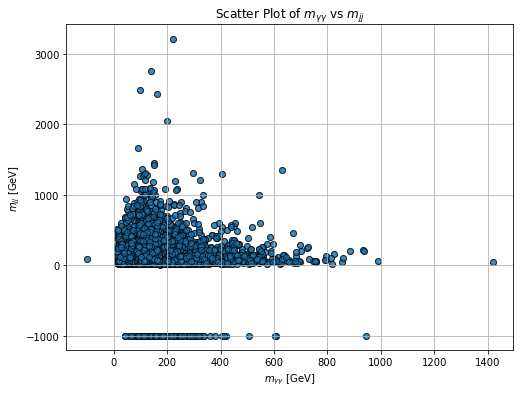

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(diphoton_mass, dijet_mass, alpha=0.6, edgecolor='k')
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("Scatter Plot of $m_{\gamma\gamma}$ vs $m_{jj}$")
plt.grid(True)
plt.show()


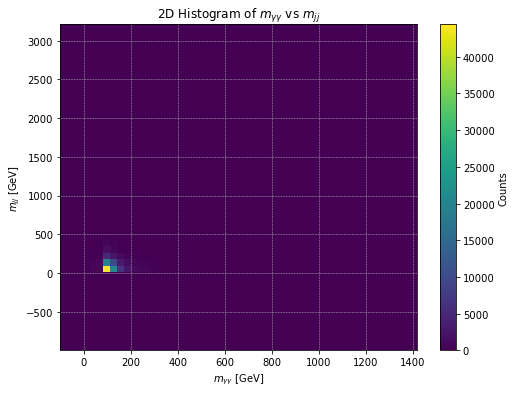

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist2d(diphoton_mass, dijet_mass, bins=(50, 50), cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("2D Histogram of $m_{\gamma\gamma}$ vs $m_{jj}$")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


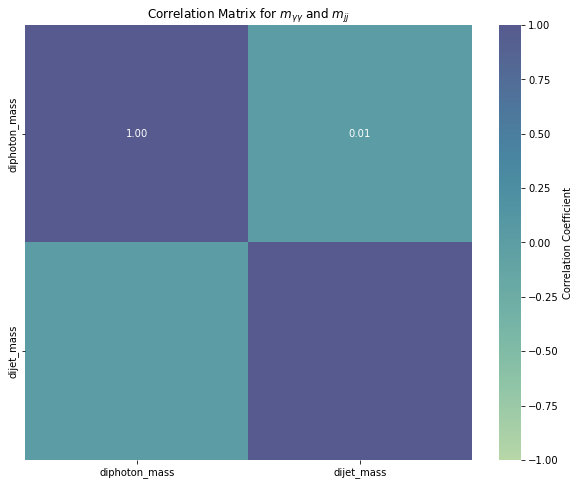

In [9]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "dijet_mass": dijet_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# # Plot the heatmap
# plt.figure(figsize=(6, 5))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", alpha = 0.8, cbar=True)
# plt.title("Correlation Matrix")
# plt.show()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{\gamma\gamma}$ and $m_{jj}$")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_data_plot_mgg_mjj.png")
plt.savefig(f"{output_dir}Correlation_data_plot_mgg_mjj.pdf")
plt.show()

In [22]:
ls /afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/

CrystalBall_Fit_Diphoton_mass.pdf  Gaussian_Fit_Diphoton_mass.pdf  index.php
CrystalBall_Fit_Diphoton_mass.png  Gaussian_Fit_Diphoton_mass.png


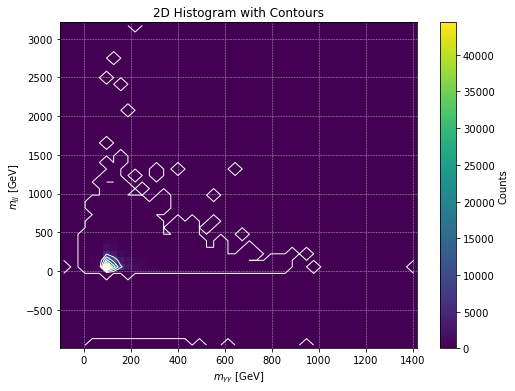

In [10]:
plt.figure(figsize=(8, 6))
counts, xedges, yedges, _ = plt.hist2d(diphoton_mass, dijet_mass, bins=(50, 50), cmap='viridis')
plt.colorbar(label='Counts')
plt.contour(
    (xedges[:-1] + xedges[1:]) / 2, 
    (yedges[:-1] + yedges[1:]) / 2, 
    counts.T, colors='white', linewidths=1
)
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel(r"$m_{jj}$ [GeV]")
plt.title("2D Histogram with Contours")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# m_{jj}vs Reduced mass

In [11]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(dijet_mass) | ak.is_none(reduced_mass))
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])
reduced_mass = ak.to_numpy(reduced_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(dijet_mass, reduced_mass)[0, 1]

print(f"Correlation coefficient between m_jj and reduced_mass: {correlation:.4f}")


Correlation coefficient between m_jj and reduced_mass: 0.1253


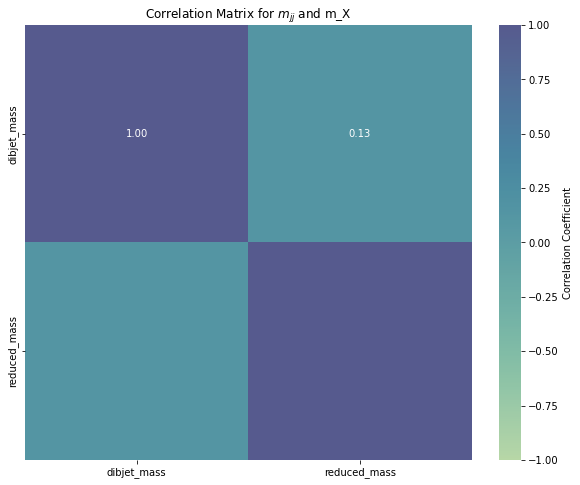

In [12]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "dibjet_mass": dijet_mass,
    "reduced_mass": reduced_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{jj}$ and m_X")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_data_plot_mjj_reducedmass.png")
plt.savefig(f"{output_dir}Correlation_data_plot_mjj_reducedmass.pdf")
plt.show()

# m_gg vs reduced mass 

In [13]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(diphoton_mass) | ak.is_none(reduced_mass))
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])
reduced_mass = ak.to_numpy(reduced_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(diphoton_mass, reduced_mass)[0, 1]

print(f"Correlation coefficient between m_γγ and reduced_mass: {correlation:.4f}")


Correlation coefficient between m_γγ and reduced_mass: 0.1030


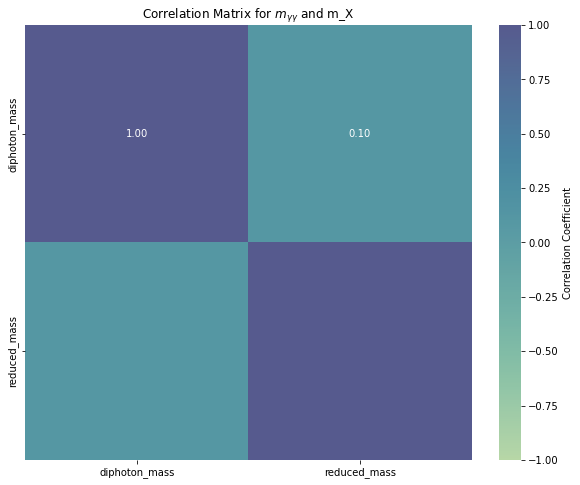

In [14]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "diphoton_mass": diphoton_mass,
    "reduced_mass": reduced_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{\gamma\gamma}$ and m_X")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_data_plot_mgg_reducedmass.png")
plt.savefig(f"{output_dir}Correlation_data_plot_mgg_reducedmass.pdf")
plt.show()

# bbgg_mass vs m_gg

In [15]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(bbgg_mass) | ak.is_none(diphoton_mass))
bbgg_mass = ak.to_numpy(bbgg_mass[valid_indices])
diphoton_mass = ak.to_numpy(diphoton_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(bbgg_mass, diphoton_mass)[0, 1]

print(f"Correlation coefficient between m_bbgg and m_gg: {correlation:.4f}")


Correlation coefficient between m_bbgg and m_gg: 0.3604


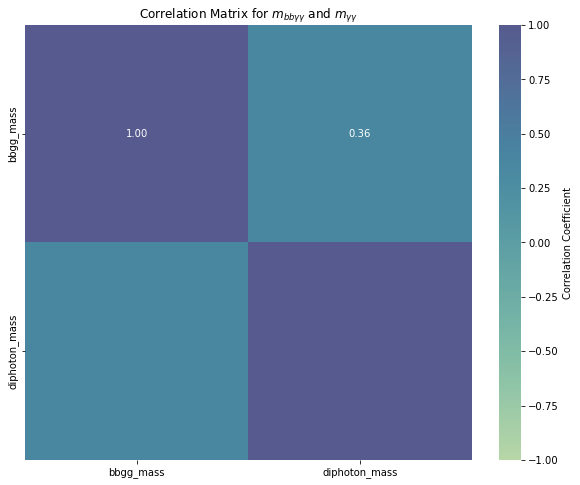

In [16]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "bbgg_mass": bbgg_mass,
    "diphoton_mass": diphoton_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{bb\gamma\gamma}$ and $m_{\gamma\gamma}$")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_data_plot_mbbgg_mgg.png")
plt.savefig(f"{output_dir}Correlation_data_plot_mbbgg_mgg.pdf")
plt.show()

# bbgg_mass vs m_jj

In [17]:
# Ensure both diphoton_mass and dijet_mass are in the same format and remove invalid entries
valid_indices = ~(ak.is_none(bbgg_mass) | ak.is_none(dijet_mass))
bbgg_mass = ak.to_numpy(bbgg_mass[valid_indices])
dijet_mass = ak.to_numpy(dijet_mass[valid_indices])

# Compute Pearson correlation coefficient
correlation = np.corrcoef(bbgg_mass, dijet_mass)[0, 1]

print(f"Correlation coefficient between m_bbgg and m_jj: {correlation:.4f}")


Correlation coefficient between m_bbgg and m_jj: 0.6918


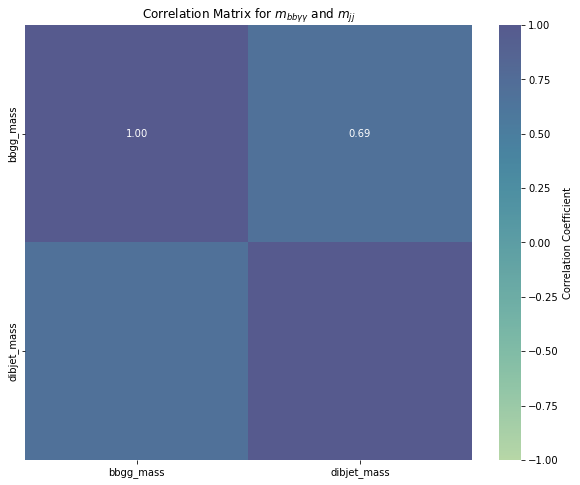

In [18]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    "bbgg_mass": bbgg_mass,
    "dibjet_mass": dijet_mass,
})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a green-blue colormap
green_blue_cmap = sns.color_palette("crest", as_cmap=True)  # Seaborn colormap

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=green_blue_cmap,  # Use the green-blue colormap
    cbar_kws={"label": "Correlation Coefficient"},  # Add colorbar label
    vmin=-1, 
    vmax=1, 
    alpha = 0.8
)

plt.title("Correlation Matrix for $m_{bb\gamma\gamma}$ and $m_{jj}$")
# Save the plot
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/"
plt.savefig(f"{output_dir}Correlation_data_plot_mbbgg_mjj.png")
plt.savefig(f"{output_dir}Correlation_data_plot_mbbgg_mjj.pdf")
plt.show()

# VAriable plot

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

import os

def plot_variable(data, xlabel, log_scale=False, xlim=None, save_dir=None,
                  filename="plot", cms_fontsize=16, legend_label="Signal"):
    """
    Plot a variable in CMS style using mplhep and save in multiple formats.

    Parameters:
    - data: NumPy array of values to plot
    - xlabel: Label for the x-axis
    - log_scale: Whether to use a logarithmic scale
    - xlim: Tuple specifying the x-axis limits (e.g., (xmin, xmax))
    - save_dir: Directory to save the plot (if None, the plot is not saved)
    - filename: Name of the file to save (without extension)
    - cms_fontsize: Font size for the CMS label text
    - legend_label: Custom label for the legend

    """
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot histogram
    counts, bins, _ = ax.hist(data, bins=20, histtype='step', lw=2, color="blue", label=legend_label)
    
    # Add CMS text
    hep.cms.label(
        "Preliminary",
        data=True,
        lumi=137.0,  # Integrated luminosity in fb^-1
        loc=0,
        ax=ax,
        fontsize=cms_fontsize
    )
    
    # Set axis labels and style
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel("Events", fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    # Set x-axis limits if provided
    if xlim:
        ax.set_xlim(xlim)
    
    # Set log scale if required
    if log_scale:
        ax.set_yscale("log")
    
    # Add legend
    ax.legend(fontsize=14)
    
    # Save or show the plot
    plt.tight_layout()
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
        plt.savefig(os.path.join(save_dir, f"{filename}.png"))
        plt.savefig(os.path.join(save_dir, f"{filename}.pdf"))
    plt.show()





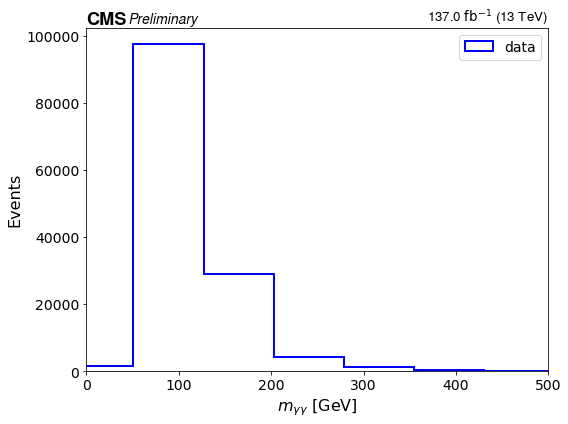

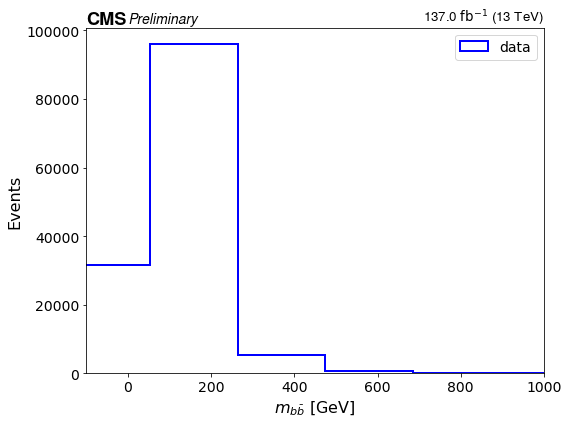

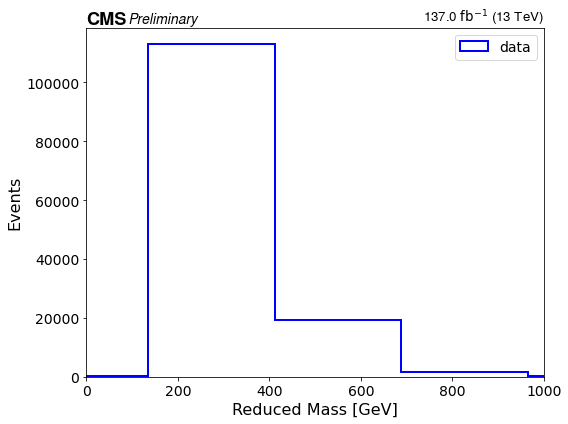

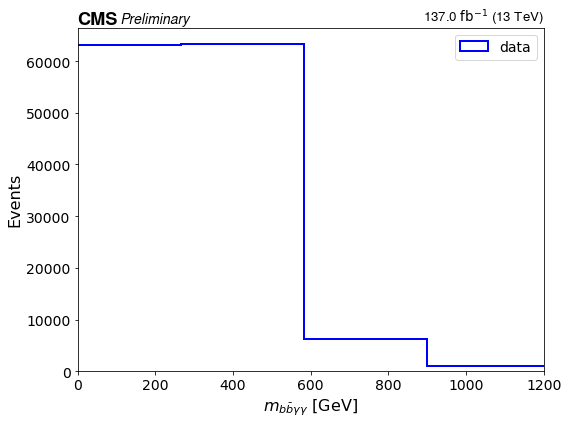

In [4]:
# Create the plots
plot_variable(
    diphoton_mass_np,
    xlabel=r"$m_{\gamma\gamma}$ [GeV]",
    xlim = (0,500),
    legend_label="data", 
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="diphoton_mass_data",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
plot_variable(
    dijet_mass,
    xlabel=r"$m_{b\bar{b}}$ [GeV]",
    xlim = (-100,1000),
    legend_label="data", 
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="dijet_mass_data",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
plot_variable(
    reduced_mass,
    xlabel=r"Reduced Mass [GeV]",
    xlim = (0,1000),
    legend_label="data", 
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="reduced_mass_data",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
plot_variable(
    bbgg_mass_np,
    xlabel=r"$m_{b\bar{b}\gamma\gamma}$ [GeV]",
    xlim = (0,1200),
    legend_label="data", 
    log_scale=False,
    save_dir="/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/",  # Folder to save the plots
    filename="bbgg_mass_data",  # Base filename for saving
    cms_fontsize=14  # Adjust CMS text size
)
